## Exploratory Data Analysis

In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import sqlite3

#import seaborn as sns
import plotly.plotly as py
import cufflinks as cf


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
db = sqlite3.connect(os.path.join('..', 'dataset', 'soccer2017.db'))

In [3]:
df = pd.io.sql.read_sql(
'''
    SELECT DISTINCT
    team_id
    ,league_id
    ,name
    ,overall
    ,attack
    ,midfield
    ,defence
    ,season
    ,season_v
    ,year
    ,month
    ,day
    ,date_value
    , date
    FROM teams t
    INNER JOIN calendar c on t.date_value = c.value
    
    WHERE team_id=1
;
''', con = db)

In [4]:
df.shape[0]

290

In [5]:
df.head()

,team_id,league_id,name,overall,attack,...,year,month,day,date_value,date
0,1,13,Arsenal,83,81,...,2017,Aug,10,158816,2017-8-10
1,1,13,Arsenal,83,81,...,2017,Aug,3,158809,2017-8-3
2,1,13,Arsenal,83,81,...,2017,Jul,31,158806,2017-7-31
3,1,13,Arsenal,83,81,...,2017,Jul,27,158802,2017-7-27
4,1,13,Arsenal,83,81,...,2017,Jul,24,158799,2017-7-24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
team_id       290 non-null int64
league_id     290 non-null int64
name          290 non-null object
overall       290 non-null int64
attack        290 non-null int64
midfield      290 non-null int64
defence       290 non-null int64
season        290 non-null object
season_v      290 non-null int64
year          290 non-null int64
month         290 non-null object
day           290 non-null int64
date_value    290 non-null int64
date          290 non-null object
dtypes: int64(10), object(4)
memory usage: 31.8+ KB


Compare stats of each team for same time frame. Take only last 5 season.

In [7]:
df_date =pd.io.sql.read_sql(
'''
    SELECT DISTINCT
        season,
        date,
        value as date_value
    FROM 
        calendar c 
    WHERE
        season_v in (17,16,15,14,13)
    
;
''', con = db)

In [8]:
df_date

,season,date,date_value
0,FIFA 17,2017-8-10,158816
1,FIFA 17,2017-8-3,158809
2,FIFA 17,2017-7-31,158806
3,FIFA 17,2017-7-27,158802
4,FIFA 17,2017-7-24,158799
...,...,...,...
283,FIFA 13,2013-3-4,157196
284,FIFA 13,2013-3-1,157193
285,FIFA 13,2013-2-22,157186
286,FIFA 13,2013-2-15,157179


In [9]:
df_team_overall_avg = pd.io.sql.read_sql(
'''
    SELECT 
    name,
    sum(overall)/count(*) as overall_avg
    FROM 
        teams
    GROUP BY
        name
    ORDER BY
        2 DESC
    
    
;
''', con = db)

In [10]:
df_team_overall_avg

,name,overall_avg
0,Chelsea,82
1,Manchester City,82
2,Arsenal,81
3,Manchester United,81
4,Liverpool,79
...,...,...
15,Hull City,72
16,Watford,72
17,Middlesbrough,71
18,Bournemouth,70


Take average cut off value as team vaue of 10th position. Since below average team have less likely chance to finish league in top 4 pos.

In [11]:
df_top_ten_teams = df_team_overall_avg.head(10)

In [12]:
df_top_ten_teams

,name,overall_avg
0,Chelsea,82
1,Manchester City,82
2,Arsenal,81
3,Manchester United,81
4,Liverpool,79
5,Tottenham Hotspur,79
6,Everton,78
7,Southampton,76
8,Stoke City,76
9,Sunderland,75


prepare dataframe for top 10 team for scatter plot

In [13]:
df_teams_data =pd.io.sql.read_sql(
'''
   SELECT DISTINCT
           team_id
        ,league_id
        ,name
        ,overall
        ,attack
        ,midfield
        ,defence
        ,season
        ,season_v
        ,year
        ,month
        ,day
        ,date_value
        , date
    FROM 
        teams t
    INNER JOIN 
        calendar c on t.date_value = c.value
    WHERE
        season_v in (17,16,15,14,13)
    ORDER BY
        name,date_value desc
    
;
''', con = db)

In [14]:
df_teams_data.groupby('name').count()

,team_id,league_id,overall,attack,midfield,...,year,month,day,date_value,date
name,,,,,,,,,,,
Arsenal,290,290,290,290,290,...,290,290,290,290,290
Bournemouth,290,290,290,290,290,...,290,290,290,290,290
Burnley,290,290,290,290,290,...,290,290,290,290,290
Chelsea,290,290,290,290,290,...,290,290,290,290,290
Crystal Palace,290,290,290,290,290,...,290,290,290,290,290
...,...,...,...,...,...,...,...,...,...,...,...
Swansea City,290,290,290,290,290,...,290,290,290,290,290
Tottenham Hotspur,290,290,290,290,290,...,290,290,290,290,290
Watford,290,290,290,290,290,...,290,290,290,290,290


In [15]:
df_teams_data[['date','date_value','season']][df_teams_data.name=='Arsenal']

,date,date_value,season
0,2017-8-10,158816,FIFA 17
1,2017-8-3,158809,FIFA 17
2,2017-7-31,158806,FIFA 17
3,2017-7-27,158802,FIFA 17
4,2017-7-24,158799,FIFA 17
...,...,...,...
285,2013-3-4,157196,FIFA 13
286,2013-3-1,157193,FIFA 13
287,2013-2-22,157186,FIFA 13
288,2013-2-15,157179,FIFA 13


In [33]:
#get all date slot from one team and append other teams data in it
df = df_date

for team in df_top_ten_teams.itertuples():    
    lst = []
    for dt in df_date.itertuples():
        val = df_teams_data[(df_teams_data.name == team.name) & (df_teams_data.date_value == dt.date_value)].head(1).overall.values[0]        
        lst.append([dt.date_value,val])        
    df_team = pd.DataFrame(lst, columns=['date_value',team.name])
    df = pd.merge(df, df_team, on='date_value')
    

In [34]:
df

,season,date,date_value,Chelsea,Manchester City,...,Tottenham Hotspur,Everton,Southampton,Stoke City,Sunderland
0,FIFA 17,2017-8-10,158816,83,83,...,81,80,78,78,76
1,FIFA 17,2017-8-3,158809,83,83,...,81,80,78,78,76
2,FIFA 17,2017-7-31,158806,83,83,...,81,80,78,78,76
3,FIFA 17,2017-7-27,158802,83,83,...,81,80,78,78,76
4,FIFA 17,2017-7-24,158799,83,83,...,81,80,78,78,76
...,...,...,...,...,...,...,...,...,...,...,...
283,FIFA 13,2013-3-4,157196,81,82,...,80,76,73,75,75
284,FIFA 13,2013-3-1,157193,81,82,...,80,76,73,75,75
285,FIFA 13,2013-2-22,157186,81,82,...,80,76,73,75,75
286,FIFA 13,2013-2-15,157179,81,82,...,80,76,73,75,75


### Lets do visualization

In [18]:
df_teams_plot=df.drop(['season','date_value'], axis=1)

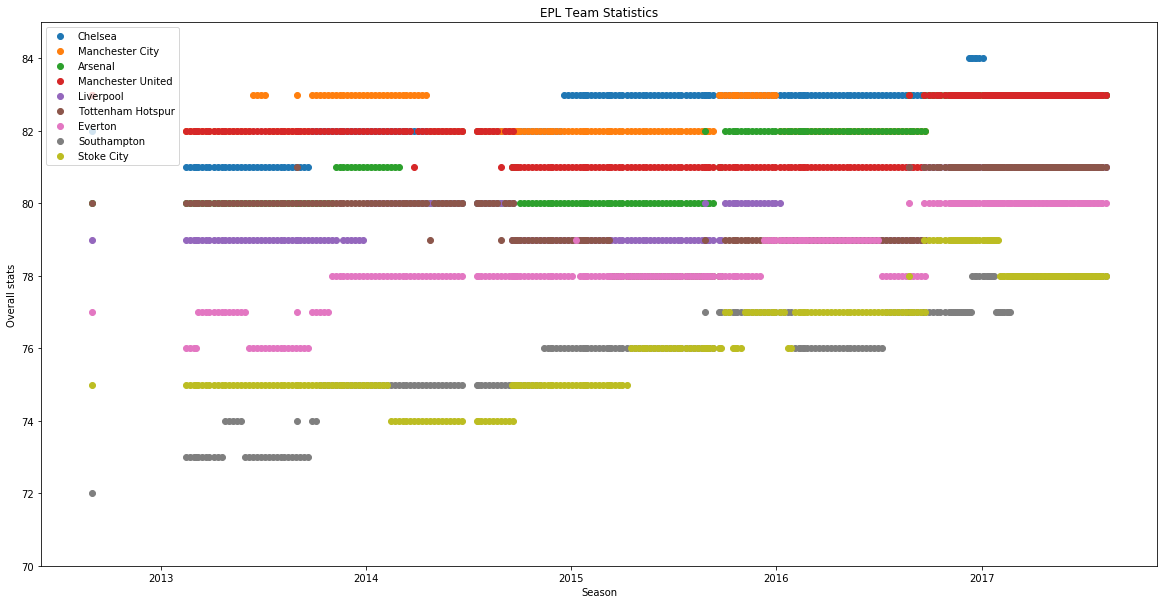

In [54]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num , DateFormatter
import datetime as dt

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(1,10):  
    ax.plot_date(df_teams_plot.date, df_teams_plot[df_teams_plot.columns.values[i]], label=df_teams_plot.columns.values[i])    

plt.legend(loc='upper left')
plt.title("EPL Team Statistics")
plt.xlabel("Season")
plt.ylabel("Overall stats")
plt.ylim(70, 85)
plt.show()